In [12]:
! pip install pyvis

In [10]:
import pandas as pd
import numpy as np

import networkx as nx
from pyvis.network import Network

import matplotlib.pyplot as plt

import math # Operaciones matemáticas
import random # Manejo de aleatorios

# Lectura de datos

In [4]:
data = pd.read_excel(r'Transacciones2.xlsx')

In [6]:
data.head()

,index,CUENTA_ORIGEN,CUENTA_DESTINO,VALOR,FECHA,OPERACION_SOSPECHOSA
0,0,51,476,2.025365e+06,2025-01-01 03:22:11,0
1,1,55,29,3.303254e+06,2025-01-01 10:02:44,0
2,2,41,137,3.180270e+04,2025-01-01 12:59:11,0
3,3,47,195,1.314048e+06,2025-01-02 00:39:53,0
4,4,51,409,2.402676e+06,2025-01-02 07:18:10,0


# Crear el grafo

In [17]:
colores = ['grey', 'red']

aristas = zip(data['CUENTA_ORIGEN'].astype('str'), data['CUENTA_DESTINO'].astype('str'), [{'title' : f'{str(round(data["VALOR"].iloc[i],0))} \n ID Transaccion: {data["index"].iloc[i]}' , 'weight' : math.log10(data['VALOR'].iloc[i]+1)/5, 'color' : colores[data['OPERACION_SOSPECHOSA'].iloc[i]]} for i in range(len(data))])

In [15]:
G = nx.MultiGraph()

In [19]:
G.add_edges_from(aristas)

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [21]:
net = Network(notebook = True)

net.from_nx(G)

net.show('Transacciones.html')

Transacciones.html


# Análisis de percolación

In [28]:
# Hace n simulaciones, en cada simulación remvueve aristas al azar y al final promedia la cantidad de componentes conexas que hay después de cada eliminación de una aristas
def percolacion_aristas_conexas(G, num_simulations = 50):
    max_edges = G.number_of_edges()
    components_runs = []
    
    for i in range(num_simulations):
        G_copy = G.copy()
        components = []
        
        while G_copy.number_of_edges() > 0:
            components.append(nx.number_connected_components(G_copy))
            edge = random.choice(list(G_copy.edges()))
            G_copy.remove_edge(*edge)

        components.append(nx.number_connected_components(G_copy))
        components_runs.append(components)
        
    # Normalizar longitud de simulaciones
    max_len = max(len(run) for run in components_runs)
    components_array = np.full((num_simulations, max_len), np.nan)
    
    for i in range(num_simulations):
        components_array[i, :len(components_runs[i])] = components_runs[i]
    # Promediar
    avg_components = np.nanmean(components_array, axis=0)
    edge_counts = list(range(max_edges, -1, -1))
    return edge_counts, avg_components

In [52]:
edge_counts, avg_components = percolacion_aristas_conexas(G, num_simulations = 50)

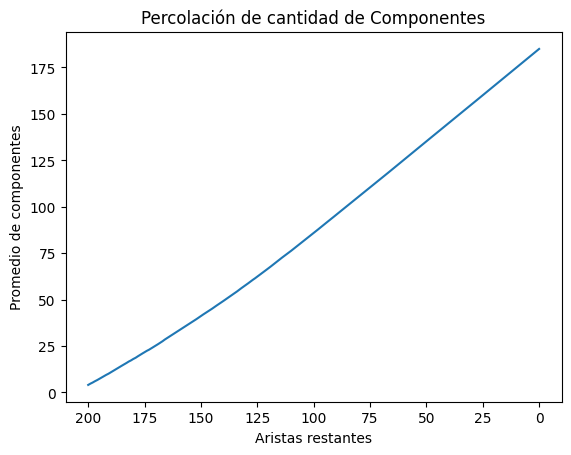

In [53]:
plt.figure()
plt.plot(edge_counts, avg_components)

plt.title('Percolación de cantidad de Componentes')
plt.ylabel('Promedio de componentes')
plt.xlabel('Aristas restantes')
plt.gca().invert_xaxis()
plt.show()

In [60]:
# Calcular el punto crítico
diff_components = np.diff(avg_components)
critical_index = np.argmax(diff_components)
critical_edge_count = edge_counts[critical_index]
critical_components = avg_components[critical_index]

print(critical_edge_count)

105


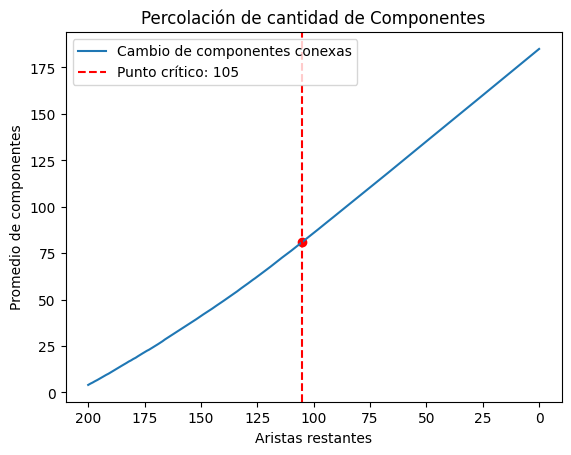

In [66]:
plt.figure()
plt.plot(edge_counts, avg_components, label = 'Cambio de componentes conexas')

plt.axvline(x=critical_edge_count, color='red', linestyle='--', label=f'Punto crítico: {critical_edge_count}')
plt.scatter(critical_edge_count, critical_components, color='red')

plt.title('Percolación de cantidad de Componentes')
plt.ylabel('Promedio de componentes')
plt.xlabel('Aristas restantes')
plt.legend()
plt.gca().invert_xaxis()
plt.show()

### Análisis del tamaño de la gran componente

In [71]:
def percolacion_aristas_gigante(G, num_simulations=50):
    max_edges = G.number_of_edges()
    giant_runs = []

    for _ in range(num_simulations):
        G_copy = G.copy()
        giants = []

        while G_copy.number_of_edges() > 0:
            giant = max(len(c) for c in nx.connected_components(G_copy))
            giants.append(giant)
            edge = random.choice(list(G_copy.edges()))
            G_copy.remove_edge(*edge)

        giants.append(max(len(c) for c in nx.connected_components(G_copy)))
        giant_runs.append(giants)

    # Normalizar longitud de simulaciones)
    max_len = max(len(run) for run in giant_runs)
    giants_array = np.full((num_simulations, max_len), np.nan)

    for i in range(num_simulations):
        giants_array[i, :len(giant_runs[i])] = giant_runs[i]

    # Promediar
    avg_giant = np.nanmean(giants_array, axis=0)
    edge_counts = list(range(max_edges, -1, -1))

    return edge_counts, avg_giant

In [95]:
edge_counts, avg_giant = percolacion_aristas_gigante(G, num_simulations = 500)

In [96]:
# Estimar punto umbral percolacion gigante
diff_giant = np.diff(avg_giant)
critical_index_giant = np.argmin(diff_giant)
critical_edge_count_giant = edge_counts[critical_index_giant]
critical_components_giant = avg_giant[critical_index_giant]


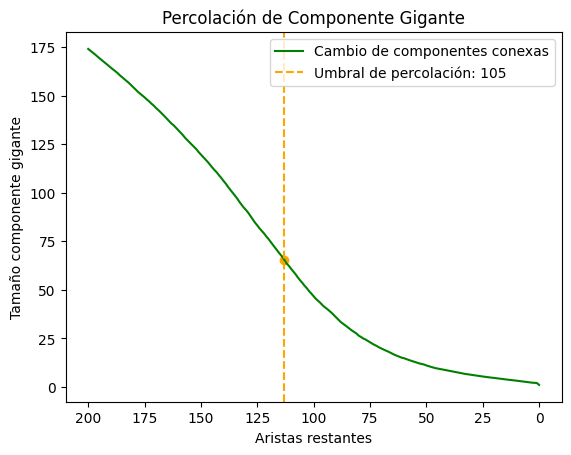

In [97]:
plt.figure()
plt.plot(edge_counts, avg_giant, label = 'Cambio de componentes conexas', color = 'green')

plt.axvline(x=critical_edge_count_giant, color='orange', linestyle='--', label=f'Umbral de percolación: {critical_edge_count}')
plt.scatter(critical_edge_count_giant, critical_components_giant, color='orange')

plt.title('Percolación de Componente Gigante')
plt.ylabel('Tamaño componente gigante')
plt.xlabel('Aristas restantes')
plt.legend()
plt.gca().invert_xaxis()
plt.show()

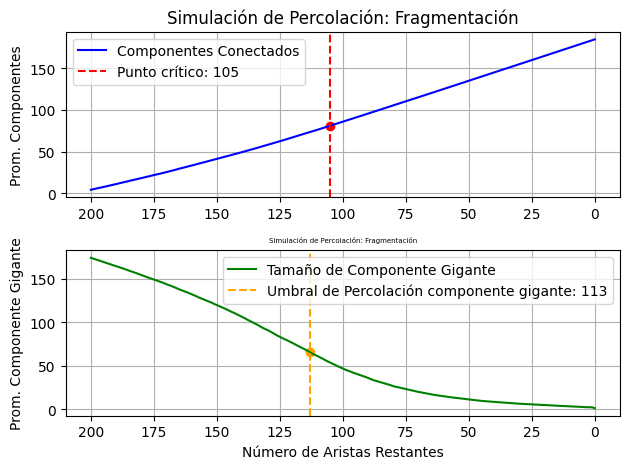

In [101]:
# Graficar
fig, ax = plt.subplots(2,1)
ax[0].plot(edge_counts, avg_components, label="Componentes Conectados", color='blue')
ax[0].axvline(x=critical_edge_count, color='red', linestyle='--', label=f'Punto crítico: {critical_edge_count}')
ax[0].scatter(critical_edge_count, critical_components, color='red')

ax[0].set_ylabel("Prom. Componentes")
ax[0].set_title("Simulación de Percolación: Fragmentación")
ax[0].legend()
ax[0].grid(True)

ax[1].plot(edge_counts, avg_giant, label="Tamaño de Componente Gigante", color='green')
ax[1].axvline(x=critical_edge_count_giant, color='orange', linestyle='--', label=f'Umbral de Percolación componente gigante: {critical_edge_count_giant}')
ax[1].scatter(critical_edge_count_giant, critical_components_giant, color='orange')

ax[1].set_ylabel("Prom. Componente Gigante")
ax[1].set_title("Simulación de Percolación: Fragmentación", fontsize = 5)
ax[1].legend()
ax[1].grid(True)

plt.xlabel("Número de Aristas Restantes")
ax[0].invert_xaxis()
ax[1].invert_xaxis()
plt.tight_layout()
plt.show()

### Simulación de percolación por nodos

In [104]:

def simulate_percolation_with_giant_component_nodes(G, num_simulations=50):
    max_nodes = G.number_of_nodes()
    components_runs = []
    giant_runs = []

    for _ in range(num_simulations):
        G_copy = G.copy()
        components = []
        giants = []

        while G_copy.number_of_edges() > 0:
            components.append(nx.number_connected_components(G_copy))
            giant = max(len(c) for c in nx.connected_components(G_copy))
            giants.append(giant)
            node = random.choice(list(G_copy.nodes()))
            G_copy.remove_node(node)
        
        components.append(nx.number_connected_components(G_copy))
        giants.append(max(len(c) for c in nx.connected_components(G_copy)))
        components_runs.append(components)
        giant_runs.append(giants)

    # Estandarizar longitud de simulaciones para sacar promedios
    max_len = max(len(run) for run in components_runs)
    components_array = np.full((num_simulations, max_len), np.nan)
    giants_array = np.full((num_simulations, max_len), np.nan)

    for i in range(num_simulations):
        components_array[i, :len(components_runs[i])] = components_runs[i]
        giants_array[i, :len(giant_runs[i])] = giant_runs[i]

    # Promediar
    avg_components = np.nanmean(components_array, axis=0)
    avg_giant = np.nanmean(giants_array, axis=0)
    node_counts = list(range(max_nodes, -1, -1))
    
    return node_counts[:len(avg_components)], avg_components, avg_giant

In [110]:
# Simular
node_counts, avg_components, avg_giant = simulate_percolation_with_giant_component_nodes(G, num_simulations=500)

# Calculo umbral de percolacion - componentes
diff_components = np.diff(avg_components)
critical_index = np.argmax(avg_components)
critical_node_count = node_counts[critical_index]
critical_components = avg_components[critical_index]

# Calculo umbral de percolacion - Gigante
diff_giant = np.diff(avg_giant)
critical_index_giant = np.argmin(diff_giant)
critical_node_count_giant = node_counts[critical_index_giant]
critical_components_giant = avg_giant[critical_index_giant]

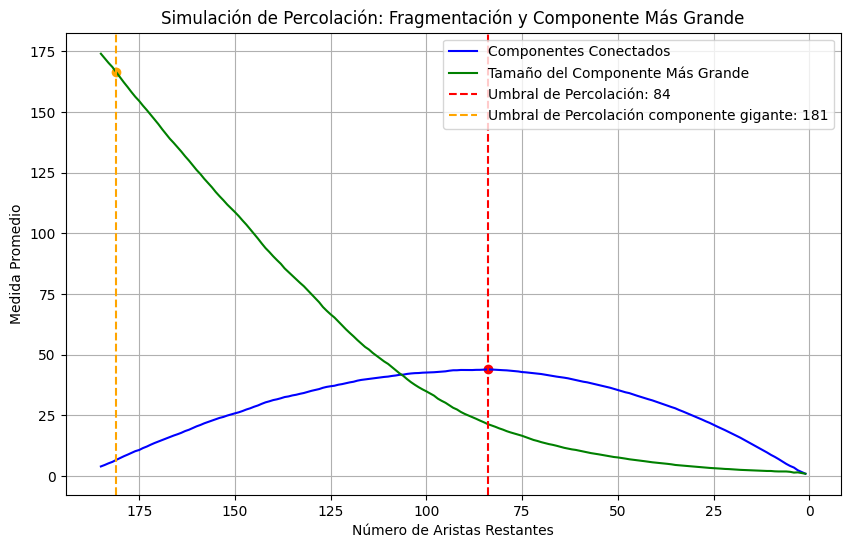

In [112]:
# Graficar
plt.figure(figsize=(10, 6))
plt.plot(node_counts, avg_components, label="Componentes Conectados", color='blue')
plt.plot(node_counts, avg_giant, label="Tamaño del Componente Más Grande", color='green')
plt.axvline(x=critical_node_count, color='red', linestyle='--', label=f'Umbral de Percolación: {critical_node_count}')
plt.scatter(critical_node_count, critical_components, color='red')
plt.axvline(x=critical_node_count_giant, color='orange', linestyle='--', label=f'Umbral de Percolación componente gigante: {critical_node_count_giant}')
plt.scatter(critical_node_count_giant, critical_components_giant, color='orange')

plt.xlabel("Número de Aristas Restantes")
plt.ylabel("Medida Promedio")
plt.title("Simulación de Percolación: Fragmentación y Componente Más Grande")
plt.legend()
plt.grid(True)
plt.gca().invert_xaxis()
plt.show()